In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None
import datetime

In [2]:
df_listings = pd.read_csv('airbnb_clean.csv')

In [3]:
len(list(df_listings.columns))

92

At the moment we have 93 columns.

In [4]:
df_listings.head(3)

,ID,Name,Summary,Space,Description,Neighborhood.Overview,Notes,Transit,Access,Interaction,...,Fire extinguisher,24-hour check-in,Smoking allowed,Wheelchair accessible,Safety card,Host Has Profile Pic,Host Identity Verified,Is Location Exact,Instant Bookable,Host Is Superhost
0,3150371,Double room + bathroom - La Latina,"Double room with own bathroom in La Latina, in...",The apartment is spacious and cozy. It is 90 m...,"Double room with own bathroom in La Latina, in...",La Latina is one of the most famous neighbourh...,NaN,The closest tube station is La Latina (line 5 ...,"You can use the kitchen, the lounge, the terra...",The bedrooms are totally separated: one at one...,...,False,False,False,False,False,True,True,True,False,False
1,3378181,"Ópera/Plz Mayor -- A/C, elevator",Old world charm meets modern comfort in our ne...,"Designed with the traveler in mind, our one-be...",Old world charm meets modern comfort in our ne...,The neighborhood is steeped in history and clo...,NaN,The apartment is close to the Ópera metro stat...,The entire apartment is yours.,We are always available to answer questions an...,...,False,False,False,False,False,True,True,True,True,False
2,2070750,Centric room with a balcony,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,-,-,-,-,-,...,False,False,False,False,False,True,True,True,False,False


## Object-type columns

Let's have a look at the columns with text. Which can be used as categorical variables and which should be transformed in order to be used in further analysis? Are there any columns with too many nulls to be useful?

In [5]:
df_listings.select_dtypes(include='object').isna().sum()

Name                               0
Summary                          485
Space                           3621
Description                        6
Neighborhood.Overview           5008
Notes                           8279
Transit                         5052
Access                          5770
Interaction                     5794
House.Rules                     4656
Host.Name                          3
Host.Since                         3
Host.Location                     42
Host.About                      5051
Host.Response.Time              1702
Host.Verifications                 5
Street                          4589
Neighbourhood.Cleansed             0
Neighbourhood.Group.Cleansed       0
Property.Type                      0
Room.Type                          0
Bed.Type                           0
Calendar.Updated                   0
First.Review                    2773
Last.Review                     2774
Cancellation.Policy                0
dtype: int64

In Notes column more than a half of values are nulls. Given this and the complementary character of the column (see the dataset description), this column can be excluded.

In [6]:
#drop the Notes column
df_listings.drop('Notes', axis=1, inplace=True)

In [7]:
df_listings.Street.unique()

array(['Palacio', nan, 'Malasaña', 'Embajadores', 'La Latina', 'Cortes',
       'Justicia', 'Sol', 'Acacias', 'Arganzuela', 'Ciudad Lineal',
       'Hortaleza', 'Villaverde', 'Arapiles', 'Trafalgar', 'Almagro',
       'La Chopera', 'Legazpi', 'Palos do Moguer', 'Prosperidad',
       'Hispanoamérica', 'Nueva España', 'Castilla', 'Bellas Vistas',
       'Cuatro Caminos', 'Valdeacederas', 'Gaztambide', 'Guindalera',
       'Lista', 'Castellana', 'El Viso', 'Recoletos', 'Goya',
       'Fuente del Berro', 'Pacifico', 'Adelfas', 'Ibiza', 'Jerónimos',
       'Rios Rosas', 'Argüelles', 'Aluche', 'Carabanchel',
       'Puente de Vallecas', 'Moratalaz', 'Villa de Vallecas',
       'Vicálvaro', 'San Blas', 'Delicias', 'Barajas', 'Estrella',
       'Usera', 'Fuencarral-El Pardo', 'Moncloa', 'Castillejos',
       'Vallehermosa', 'Almenara', 'Berruguete', 'Chamberí', 'Imperial',
       'Atocha', 'Retiro', 'Ciudad Jardin', 'El Tréntaiseis',
       'Pozuelo de Alarcón', 'Tetuán', 'Centro', 'Valderrodr

The Street columns appears to be just another column with Neighbourhoods, but will a lot of null values. Given that we already have Neighbourhood.Cleansed & Neighbourhood.Group.Cleansed, the Street column can be omitted.

In [8]:
df_listings.drop('Street', axis=1, inplace=True)

In [9]:
df_listings.select_dtypes(include='object').head(3)

,Name,Summary,Space,Description,Neighborhood.Overview,Transit,Access,Interaction,House.Rules,Host.Name,...,Host.Verifications,Neighbourhood.Cleansed,Neighbourhood.Group.Cleansed,Property.Type,Room.Type,Bed.Type,Calendar.Updated,First.Review,Last.Review,Cancellation.Policy
0,Double room + bathroom - La Latina,"Double room with own bathroom in La Latina, in...",The apartment is spacious and cozy. It is 90 m...,"Double room with own bathroom in La Latina, in...",La Latina is one of the most famous neighbourh...,The closest tube station is La Latina (line 5 ...,"You can use the kitchen, the lounge, the terra...",The bedrooms are totally separated: one at one...,Care and respect are both required in the comm...,Daniel Y Ximena,...,"email,phone,reviews,jumio",Palacio,Centro,Apartment,Private room,Real Bed,4 days ago,2014-06-15,2017-04-01,flexible
1,"Ópera/Plz Mayor -- A/C, elevator",Old world charm meets modern comfort in our ne...,"Designed with the traveler in mind, our one-be...",Old world charm meets modern comfort in our ne...,The neighborhood is steeped in history and clo...,The apartment is close to the Ópera metro stat...,The entire apartment is yours.,We are always available to answer questions an...,The Golden Rule shall apply always :) The apar...,Michael,...,"email,phone,facebook,reviews,jumio,work_email",Palacio,Centro,Apartment,Entire home/apt,Real Bed,5 days ago,2014-07-09,2017-02-28,strict
2,Centric room with a balcony,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,-,-,-,-,-,Sergio,...,"email,phone,reviews,jumio",Palacio,Centro,Apartment,Private room,Real Bed,4 days ago,2014-07-22,2017-03-07,flexible


The columns Summary, Space, Description, Neighborhood.Overview, Transit, Access, Interaction, House.Rules and Host.About are all text columns that cannot be converted to categorical variables. One way to use them in our analysis could be to count the length of each description and see if lengthy texts have an impact on listing's popularity and price. However, having 9 numerical features for text columns can be a bit, so let's combine listing description columns Summary and Description into a columns with number of words, and create two other True/False columns for house rules and host description.

In [10]:
col_list = ['Summary', 'Description']
for i in col_list:
    df_listings[i+'.Length'] = 0
    for index, value in df_listings[i].items():
        #count the length of each non null description
        if type(value) == str:
               df_listings[i+'.Length'][index] = len(value.split())
        #impute null and non text values with zeros because null here means that the description is missing
        else:
            df_listings[i+'.Length'][index] = 0
    #cast the column as integer
    df_listings[i +'.Length'] = df_listings[i +'.Length'].astype('int32')
#drop the original text columns
df_listings.drop(col_list, axis=1, inplace=True)

In [11]:
#combine 7 features that add to the listing's description
df_listings['Listing.Description.Length'] = df_listings['Summary.Length'] + df_listings['Description.Length']
#convert Host.About and House.Rules to True/False
df_listings['House.Rules'] = df_listings['House.Rules'].isna()
df_listings['Host.About'] = df_listings['Host.About'].isna()
#drop the original columns
df_listings.drop(['Summary.Length', 'Space', 'Description.Length', 'Neighborhood.Overview',
                  'Transit', 'Access', 'Interaction'], axis=1, inplace=True)
df_listings[['Listing.Description.Length', 'House.Rules', 'Host.About']].head(3)

,Listing.Description.Length,House.Rules,Host.About
0,199,False,False
1,186,False,False
2,134,False,False


Let's have a look at the Name column and its length as well.

In [12]:
df_listings['Name'].str.len().max()

75

**A name consisting of 75 words seems to be a bit too lengthy and uninformative for our analysis. It can be truncated to, for example, 40 characters.**

In [13]:
df_listings['Name'] = df_listings['Name'].str[0:40] + '…'
df_listings['Name'].head()

0     Double room + bathroom - La Latina…
1       Ópera/Plz Mayor -- A/C, elevator…
2            Centric room with a balcony…
3    PLAZA DE ESPAÑA - Único - Gimnasio.…
4      Loft/duplex 150m2, 3 double rooms…
Name: Name, dtype: object

The First.Review and Last.Review columns are not relevant for our analysis and can be dropped.

In [14]:
df_listings.drop(['First.Review', 'Last.Review'], axis=1, inplace=True)

In [15]:
df_listings.columns

Index(['ID', 'Name', 'House.Rules', 'Host.ID', 'Host.Name', 'Host.Since',
       'Host.Location', 'Host.About', 'Host.Response.Time',
       'Host.Response.Rate', 'Host.Listings.Count', 'Host.Verifications',
       'Neighbourhood.Cleansed', 'Neighbourhood.Group.Cleansed', 'Zipcode',
       'Latitude', 'Longitude', 'Property.Type', 'Room.Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed.Type', 'Price', 'Weekly.Price',
       'Monthly.Price', 'Security.Deposit', 'Cleaning.Fee', 'Guests.Included',
       'Extra.People', 'Minimum.Nights', 'Maximum.Nights', 'Calendar.Updated',
       'Availability.30', 'Availability.60', 'Availability.90',
       'Availability.365', 'Number.of.Reviews', 'Review.Scores.Rating',
       'Review.Scores.Accuracy', 'Review.Scores.Cleanliness',
       'Review.Scores.Checkin', 'Review.Scores.Communication',
       'Review.Scores.Location', 'Review.Scores.Value', 'Cancellation.Policy',
       'Reviews.per.Month', 'TV', 'Internet', 'Wireless Interne

We could calculate each host's tenure in relation to the last scrape date.

In [16]:
#convert Host.Since to datetime
df_listings['Host.Since'] = pd.to_datetime(df_listings['Host.Since'], format='%Y-%m-%d')

In [17]:
#create a datetima variable with the last scrapping date
last_scraped = datetime.datetime.strptime('2017-04-08', '%Y-%m-%d')

In [18]:
#create a column with host's tenure
df_listings['Host.Tenure'] = last_scraped - df_listings['Host.Since']
#drop the original column
df_listings.drop('Host.Since', axis=1, inplace=True)

In [19]:
df_listings['Host.Tenure'].head()

0   1160 days
1   2097 days
2   1389 days
3   1901 days
4   1255 days
Name: Host.Tenure, dtype: timedelta64[ns]

In [20]:
df_listings['Calendar.Updated'].unique()

array(['4 days ago', '5 days ago', 'today', '4 weeks ago', 'a week ago',
       '2 months ago', '2 weeks ago', '6 days ago', '3 weeks ago',
       'never', '6 months ago', 'yesterday', '1 week ago', '6 weeks ago',
       '10 months ago', '5 weeks ago', '7 months ago', '3 days ago',
       '17 months ago', '13 months ago', '11 months ago', '3 months ago',
       '22 months ago', '18 months ago', '5 months ago', '4 months ago',
       '8 months ago', '20 months ago', '2 days ago', '16 months ago',
       '14 months ago', '24 months ago', '7 weeks ago', '19 months ago',
       '15 months ago', '12 months ago', '48 months ago', '9 months ago',
       '21 months ago', '30 months ago', '26 months ago', '29 months ago',
       '23 months ago', '34 months ago', '51 months ago', '25 months ago',
       '45 months ago', '31 months ago', '35 months ago', '33 months ago',
       '28 months ago', '27 months ago', '37 months ago', '57 months ago',
       '58 months ago', '52 months ago', '50 months 

An interval value might be more informative for the Calendar.Updated column. We can calculate the integer values for days elapsed between the last calendar update and the scrapping. The value "never" might pose a problem.

In [21]:
#create a new column with period since last calendar update in days
df_listings['Days.from.Cal.Update'] = 0
for  index, value in df_listings['Calendar.Updated'].items():
    if 'days ago' in value:
        df_listings['Days.from.Cal.Update'][index] = int(value.split()[0])
    elif 'weeks ago' in value:
        df_listings['Days.from.Cal.Update'][index] = int(value.split()[0]) * 7
    elif 'months ago' in value:
        df_listings['Days.from.Cal.Update'][index] = int(value.split()[0]) * 30
    elif value == 'today':
        df_listings['Days.from.Cal.Update'][index] = 0
    elif value == 'yesterday':
        df_listings['Days.from.Cal.Update'][index] = 1
    elif value == 'never':
        df_listings['Days.from.Cal.Update'][index] = df_listings['Days.from.Cal.Update'].max()
#drop the original Calendar.Updated column
df_listings.drop('Calendar.Updated', axis=1, inplace=True)

In [22]:
df_listings['Host.Verifications'].head()

0                        email,phone,reviews,jumio
1    email,phone,facebook,reviews,jumio,work_email
2                        email,phone,reviews,jumio
3    email,phone,facebook,reviews,jumio,work_email
4                        email,phone,reviews,jumio
Name: Host.Verifications, dtype: object

The column Host.Verifications is not informative as it is. A more interesting feature would be the number of different verifications for each host.

In [23]:
#impute null values in Host.Verifications column with zeros
df_listings.loc[df_listings['Host.Verifications'].isna(), 'Host.Verifications'] = 0

In [24]:
#add a new column 'N.of.Host.Verifications with the count of host's verifications
df_listings['N.of.Host.Verifications'] = 0
for index, value in df_listings['Host.Verifications'].items():
    if value == 0:
        df_listings['N.of.Host.Verifications'][index] = 0
    else:
        df_listings['N.of.Host.Verifications'][index] = len(value.split(','))
#drop the original Host.Verifications column
df_listings.drop('Host.Verifications', axis=1, inplace=True)

Let's have a look at the hosts' location.

In [25]:
df_listings['Host.Location'].unique()

array(['Madrid, Community of Madrid, Spain', 'Madrid, Madrid, Spain',
       'Region of Murcia, Spain',
       'Majadahonda, Community of Madrid, Spain', 'ES',
       'Vitoria-Gasteiz, Basque Country, Spain',
       'Paris, Île-de-France, France', 'Granada, Andalusia, Spain',
       'San Martín de la Vega, Comunidad de Madrid, Spain',
       'Madrid, SP, Spain', 'Cluj-Napoca, Cluj County, Romania',
       'Alcobendas, Community of Madrid, Spain',
       'Galapagar, Comunidad de Madrid, Spain', 'US', 'Spain',
       'Cartagena, Región de Murcia, Spain',
       'Las Rozas, Community of Madrid, Spain',
       'Boadilla del Monte, Comunidad de Madrid, Spain',
       'Sydney, New South Wales, Australia',
       'Santiago, Santiago Metropolitan Region, Chile',
       'Martínez, Buenos Aires Province, Argentina', 'Switzerland',
       'Santa Coloma de Gramenet, Catalunya, Spain',
       'El Molar, Comunidad de Madrid, Spain', 'Deutschland',
       'Las Palmas de Gran Canaria, Canary Islands, 

Does it have an impact if the host lives in the same city, in this case Madrid? Let's create a new True/False column Madrid.Based.

In [26]:
#create a new True/False column Madrid.Based
df_listings['Madrid.Based'] = df_listings['Host.Location'].str.contains('Madrid')

#drop the original column
df_listings.drop('Host.Location', axis=1, inplace=True)

The host response rate can be an interesting metric as well.

In [27]:
#show the unique values
df_listings['Host.Response.Time'].unique()

array(['within a day', 'within an hour', 'within a few hours', nan,
       'a few days or more'], dtype=object)

In [28]:
#show the number of null values
df_listings['Host.Response.Time'].isna().sum()

1702

In [29]:
#for the sake of visualization these can be imputed with a description
df_listings.loc[df_listings['Host.Response.Time'].isna(), 'Host.Response.Time'] = 'information not available'

Let's explore the Property.Type, Room.Type, Bed.Type & Cancellation.Policy categorical features. As we have seen earlier these columns don't have any null values.

In [30]:
df_listings['Property.Type'].unique()

array(['Apartment', 'Guesthouse', 'Other', 'House', 'Condominium',
       'Bed & Breakfast', 'Loft', 'Dorm', 'Hostel', 'Chalet',
       'Casa particular', 'Townhouse', 'Serviced apartment',
       'Boutique hotel', 'Earth House', 'Camper/RV', 'Villa',
       'Guest suite', 'Timeshare', 'Bungalow', 'Tent', 'Boat'],
      dtype=object)

In [31]:
df_listings['Room.Type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [32]:
df_listings['Bed.Type'].unique()

array(['Real Bed', 'Pull-out Sofa', 'Futon', 'Couch', 'Airbed'],
      dtype=object)

In [33]:
df_listings['Cancellation.Policy'].unique()

array(['flexible', 'strict', 'moderate', 'super_strict_60',
       'super_strict_30'], dtype=object)

These four columns are ready to be used in our analysis and visualization.

## Bool-type columns

In [34]:
df_listings.select_dtypes(include='bool').isna().sum()

House.Rules                  0
Host.About                   0
TV                           0
Internet                     0
Wireless Internet            0
Kitchen                      0
Doorman                      0
Elevator in building         0
Buzzer/wireless intercom     0
Heating                      0
Washer                       0
Essentials                   0
Shampoo                      0
Hangers                      0
Air conditioning             0
Breakfast                    0
Family/kid friendly          0
Dryer                        0
Hair dryer                   0
Iron                         0
Laptop friendly workspace    0
Pets allowed                 0
Smoke detector               0
Carbon monoxide detector     0
First aid kit                0
Fire extinguisher            0
24-hour check-in             0
Smoking allowed              0
Wheelchair accessible        0
Safety card                  0
Host Has Profile Pic         0
Host Identity Verified       0
Is Locat

There are no null values in bool columns. However, some of them might not be useful.

Are Internet and Wireless Internet duplicates?

In [35]:
df_listings.loc[df_listings['Internet'] != df_listings['Wireless Internet'], ['Internet', 'Wireless Internet']]

,Internet,Wireless Internet
76,True,False
422,True,False
443,True,False
516,True,False
604,True,False
...,...,...
12797,True,False
12895,True,False
12926,True,False
12988,True,False


There are 114 observations with non-wireless Internet. Is this distinction important? Should we just one of the columns?

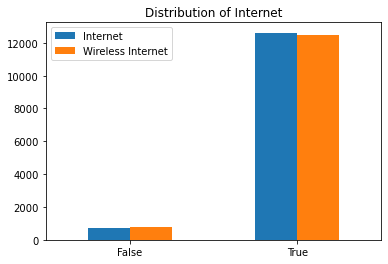

In [36]:
df_internet = pd.concat([df_listings.groupby('Internet', as_index=False).aggregate({'Internet': 'count'}),\
                        df_listings.groupby('Wireless Internet', as_index=False).aggregate({'Wireless Internet': 'count'})], axis=1)

df_internet.plot.bar()
plt.title('Distribution of Internet')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

Actually there isn't a lot of False values in either column. Let's drop Wireless Internet as a subtype of Internet.

In [37]:
df_listings.drop('Wireless Internet', axis=1, inplace=True)

Are Smoke detector and Carbon monoxide detector columns duplicates?

In [38]:
df_listings.loc[df_listings['Smoke detector'] != df_listings['Carbon monoxide detector'], ['Smoke detector', 'Carbon monoxide detector']]

,Smoke detector,Carbon monoxide detector
32,True,False
38,True,False
54,True,False
90,True,False
106,True,False
...,...,...
13176,True,False
13197,True,False
13207,True,False
13272,True,False


There are 686 observations where these two don't match.

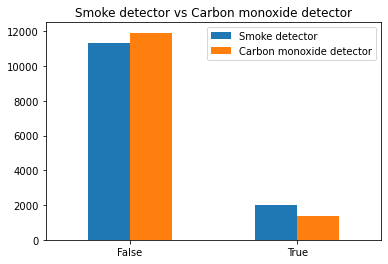

In [39]:
df_internet = pd.concat([df_listings.groupby('Smoke detector', as_index=False).aggregate({'Smoke detector': 'count'}),\
                        df_listings.groupby('Carbon monoxide detector', as_index=False).aggregate({'Carbon monoxide detector': 'count'})], axis=1)

df_internet.plot.bar()
plt.title('Smoke detector vs Carbon monoxide detector')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

There is only a small part of listings that have detectors. It could be an important feature.

Let's have a look at the distribution of other boolean variables.

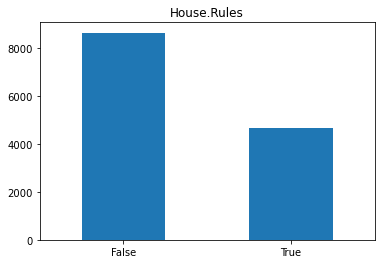

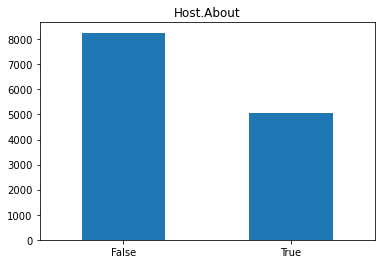

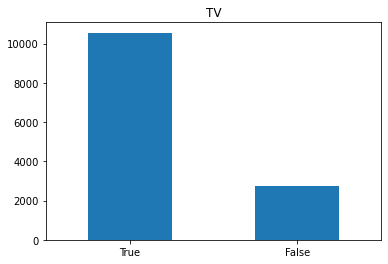

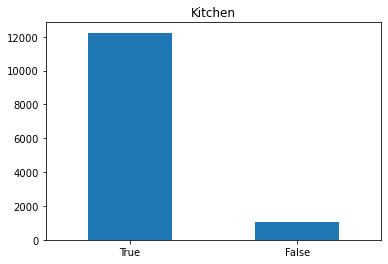

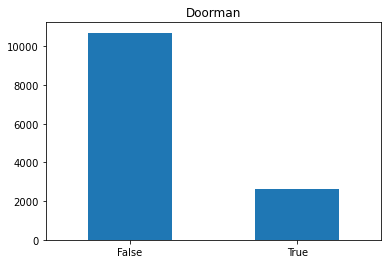

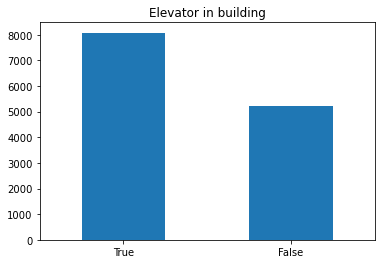

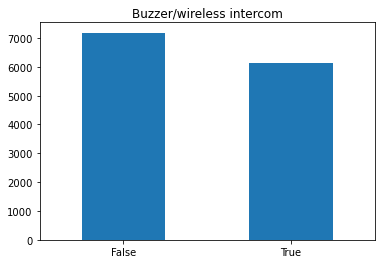

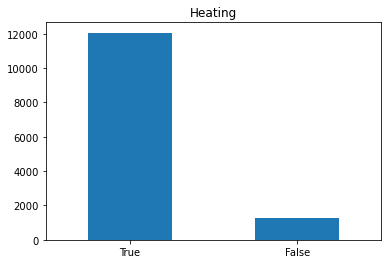

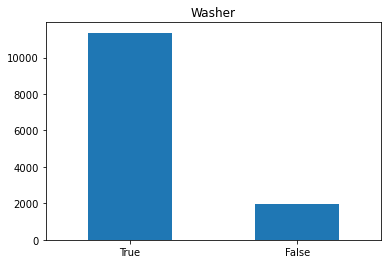

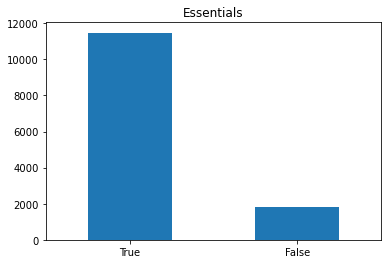

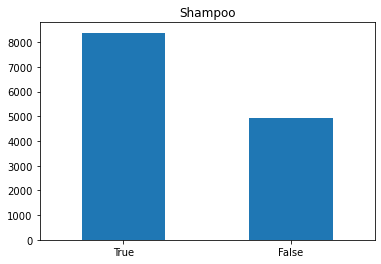

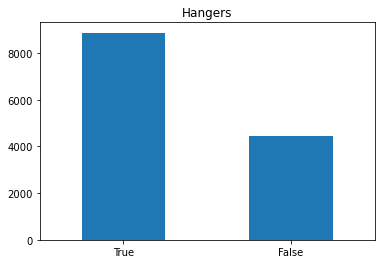

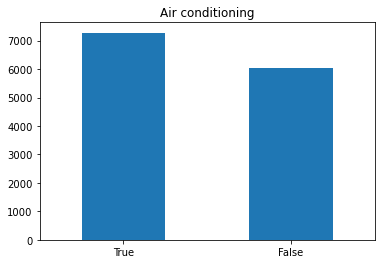

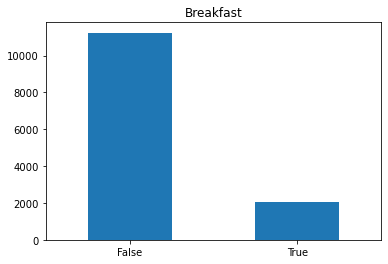

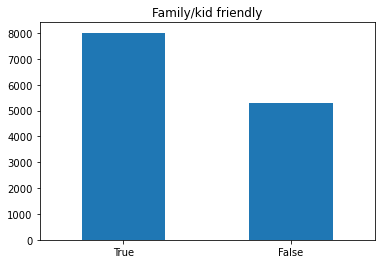

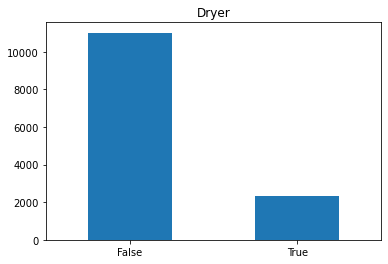

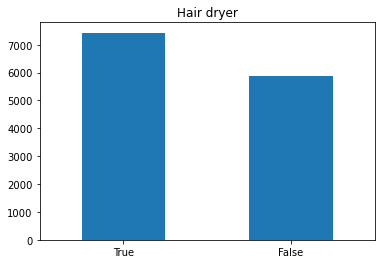

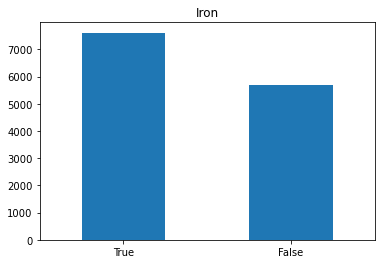

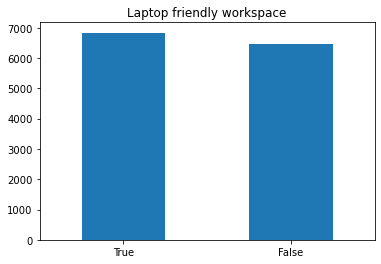

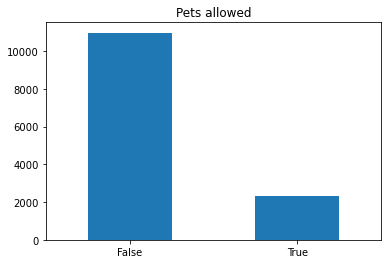

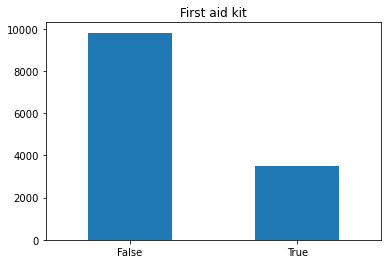

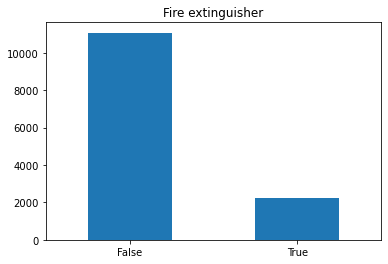

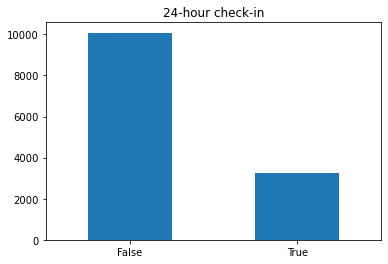

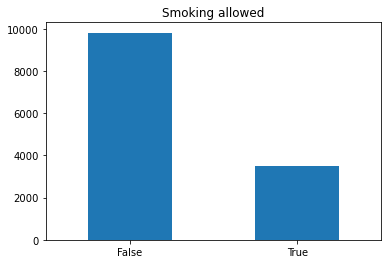

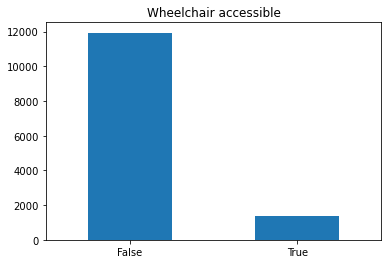

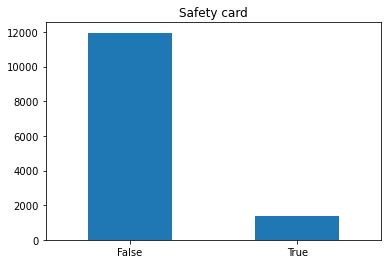

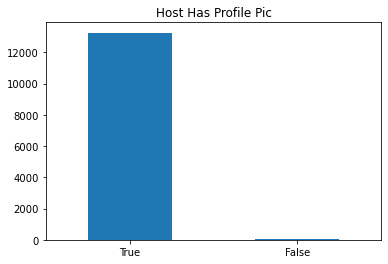

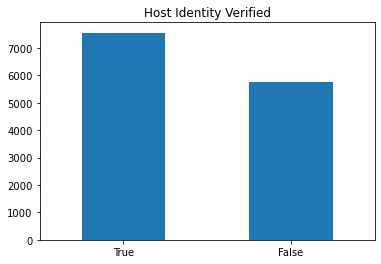

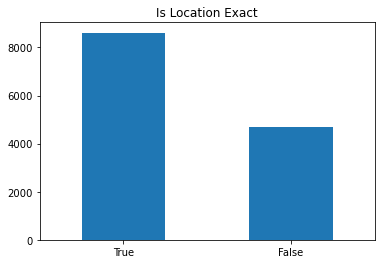

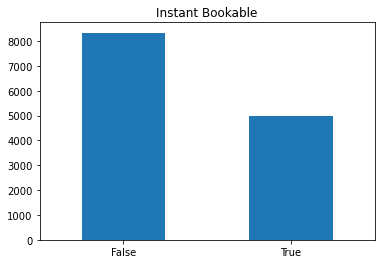

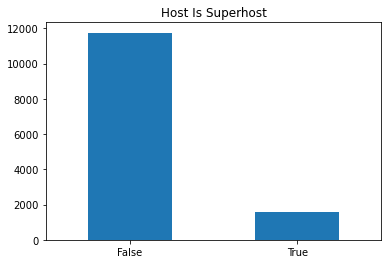

In [40]:
bool_columns = list(df_listings.select_dtypes(include='bool'))
treated = ['Internet', 'Smoke detector', 'Carbon monoxide detector']
for i in bool_columns:
    if i not in treated:
        df_listings[i].value_counts().plot.bar()
        plt.title(i)
        plt.xticks(rotation=0)
        plt.show()

- Almost all hosts have profile pictures, so it appears to be a redundant feature.
- Hangers doesn't seem to be a relevant feature.
- Safety card doesn't seem to be a relevant feature.

In [41]:
df_listings.drop(['Host Has Profile Pic', 'Hangers', 'Safety card'], axis=1, inplace=True)

### Columns with numeric variables

In [42]:
df_listings.select_dtypes(include=['float64', 'int32', 'int64']).isna().sum()

ID                                0
Host.ID                           0
Host.Response.Rate             1702
Host.Listings.Count               3
Zipcode                         450
Latitude                          0
Longitude                         0
Accommodates                      0
Bathrooms                        48
Bedrooms                         23
Beds                             48
Price                             0
Weekly.Price                   9948
Monthly.Price                  9989
Security.Deposit               7663
Cleaning.Fee                   5468
Guests.Included                   0
Extra.People                      0
Minimum.Nights                    0
Maximum.Nights                    0
Availability.30                   0
Availability.60                   0
Availability.90                   0
Availability.365                  0
Number.of.Reviews                 0
Review.Scores.Rating           2898
Review.Scores.Accuracy         2916
Review.Scores.Cleanliness   

**How could nulls in 'Host.Response.Rate' be explained? Is it an active host or someone who registered once but is not using the platform?**

In [43]:
#calculate mean and median for metrics that might indicate low usage
df_listings.loc[df_listings['Host.Response.Rate'].isna(), ['Number.of.Reviews', 'Availability.30',
                                                           'Availability.60', 'Availability.90', 'Availability.365',
                                                           'Days.from.Cal.Update']].aggregate(['median', 'mean'])

,Number.of.Reviews,Availability.30,Availability.60,Availability.90,Availability.365,Days.from.Cal.Update
median,0.000000,0.000000,0.000000,0.000000,26.000000,210.000000
mean,3.153349,7.657462,16.645123,27.547591,126.505875,277.658637


**These listings seem to have little activity in general. The nulls in response rate could be imputed with zeros in this case.**

In [44]:
df_listings.loc[df_listings['Host.Response.Rate'].isna(),'Host.Response.Rate'] = 0

In [45]:
#check the null values in 'Host.Listings.Count'
df_listings.loc[df_listings['Host.Listings.Count'].isna(), ['Host.ID', 'Host.Name', 'Host.Response.Time', 'Host.Response.Rate',
                'Host.Listings.Count', 'Host.Tenure', 'Host Identity Verified', 'N.of.Host.Verifications',
                'Number.of.Reviews', 'Availability.30','Availability.60', 'Availability.90',
                'Availability.365', 'Days.from.Cal.Update']]

,Host.ID,Host.Name,Host.Response.Time,Host.Response.Rate,Host.Listings.Count,Host.Tenure,Host Identity Verified,N.of.Host.Verifications,Number.of.Reviews,Availability.30,Availability.60,Availability.90,Availability.365,Days.from.Cal.Update
1621,40516896,NaN,information not available,0.0,NaN,NaT,False,1,0,0,0,0,0,600
6266,36068881,NaN,information not available,0.0,NaN,NaT,False,1,0,0,0,0,0,660
12253,46845753,NaN,information not available,0.0,NaN,NaT,False,1,0,0,0,0,0,540


There are only 3 null values in 'Host.Listings.Count' column. The host information for these observations is missing altogether.
The host probably deleted their account, or their identity wasn't verified. Let's drop these 3 observations.

In [46]:
df_listings.drop(df_listings[df_listings['Host.Listings.Count'].isna()].index, axis=0, inplace=True)

Maximum and Minimum Nights are an important indicator of host's approach to short-term and long-term renting.

In [47]:
df_listings['Minimum.Nights'].quantile([0.01, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

0.01     1.0
0.25     1.0
0.50     2.0
0.75     3.0
0.90     4.0
0.95     7.0
0.99    25.0
Name: Minimum.Nights, dtype: float64

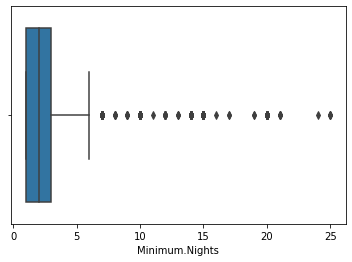

In [48]:
mask_nights = df_listings['Minimum.Nights'] <= 25
sns.boxplot(data=df_listings[mask_nights], x='Minimum.Nights')
plt.show()

There are some clear **outliers** in this column. Although 99% of data is under 25 nights, excluding these outliers might not be a good idea at this point because they can indicate listings that target exclusively long-term rental.

In [49]:
df_listings['Maximum.Nights'].describe()

count      13307.000000
mean         959.706846
std         8892.446022
min            1.000000
25%          365.000000
50%         1125.000000
75%         1125.000000
max      1000000.000000
Name: Maximum.Nights, dtype: float64

In [50]:
df_listings['Maximum.Nights'].quantile([0.01, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

0.01       3.0
0.25     365.0
0.50    1125.0
0.75    1125.0
0.90    1125.0
0.95    1125.0
0.99    1125.0
Name: Maximum.Nights, dtype: float64

**Most hosts are not willing to limit maximum booking time. However, the maximum of 1000.000 days, or 2740 years seems to be a bit extreme.**

In [51]:
#calculate the 1.5 interquartile range to filter out unrealistic upper outliers
iqr_metric = (df_listings['Maximum.Nights'].quantile(0.75) -  df_listings['Maximum.Nights'].quantile(0.25)) * 1.5
upper_limit = df_listings['Maximum.Nights'].quantile(0.75) + iqr_metric

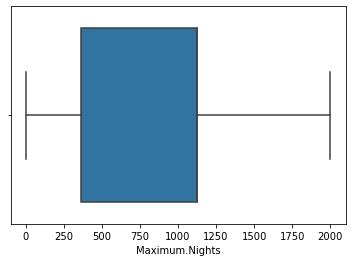

In [52]:
mask_nights = df_listings['Maximum.Nights'] <= upper_limit
sns.boxplot(data=df_listings[mask_nights], x='Maximum.Nights')
plt.show()

Setting the upper outliers to the upper limit of 2265 days, or roughly 6 years should be enough to indicate the long-term approach of the host.

In [53]:
df_listings.loc[df_listings['Maximum.Nights'] > upper_limit, 'Maximum.Nights'] = 2265

There are 3 columns for price, two of them with a lot of null values. How could we transform or impute them?

In [54]:
df_listings[['Price', 'Weekly.Price', 'Monthly.Price']].isna().sum()

Price               0
Weekly.Price     9946
Monthly.Price    9987
dtype: int64

Assuming that the weekly price and monthly price are indicated only if there is a special discount we can convert these columns to boolean values to se if there is a discount or not.

In [55]:
df_listings['Weekly.Price'] = df_listings['Weekly.Price'].isna()

In [56]:
df_listings['Monthly.Price'] = df_listings['Monthly.Price'].isna()

In [57]:
df_listings['Weekly.Price'].value_counts()

True     9946
False    3361
Name: Weekly.Price, dtype: int64

In [58]:
df_listings['Monthly.Price'].value_counts()

True     9987
False    3320
Name: Monthly.Price, dtype: int64

There are a lot of null values in Security.Deposit and Cleaning.Fee columns. Can they be imputed with zeros or there is another explatation for these nulls?

In [59]:
#prepare a subset for visualization
for_viz = df_listings[['Room.Type', 'Security.Deposit', 'Cleaning.Fee']]
for_viz['Deposit'] = for_viz['Security.Deposit'].isna()
for_viz['Cleaning'] = for_viz['Cleaning.Fee'].isna()
for_viz.drop(['Security.Deposit', 'Cleaning.Fee'], axis=1, inplace=True)

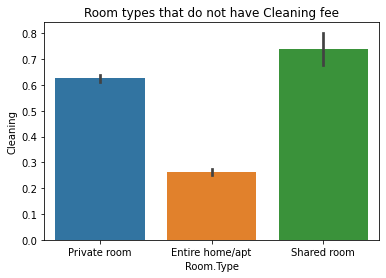

In [60]:
sns.barplot(data=for_viz, x='Room.Type', y='Cleaning')
plt.title('Room types that do not have Cleaning fee')
plt.show()

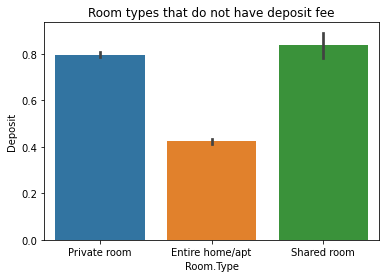

In [61]:
sns.barplot(data=for_viz, x='Room.Type', y='Deposit')
plt.title('Room types that do not have deposit fee')
plt.show()

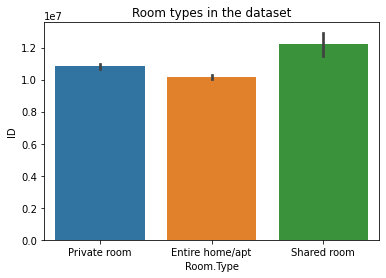

In [62]:
sns.barplot(data=df_listings, x='Room.Type', y='ID')
plt.title('Room types in the dataset')
plt.show()

The proportion of Entire home type is less in groups that have no cleaning fee or no deposit than in the general dataset. The Private Room and Shared Room types are more likely to have null values for Cleaning fee and Deposit fee.
Given that some Airbnb listing come without these fees, the nulls could be explained by zero fees.

In [63]:
#impute null values with zeros
df_listings['Security.Deposit'].fillna(0, inplace=True)
df_listings['Cleaning.Fee'].fillna(0, inplace=True)

Let's check the quality of listings' Availability columns.

In [64]:
df_listings[['Availability.30', 'Availability.60', 'Availability.90', 'Availability.365']].describe()

,Availability.30,Availability.60,Availability.90,Availability.365
count,13307.000000,13307.000000,13307.000000,13307.000000
mean,8.812054,23.045314,40.266551,205.822875
std,9.132634,19.558723,29.390644,126.901756
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,13.000000,84.000000
50%,6.000000,20.000000,38.000000,247.000000
75%,14.000000,38.000000,65.000000,321.000000
max,30.000000,60.000000,90.000000,365.000000


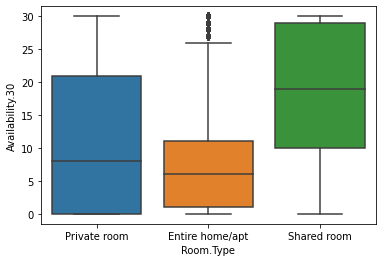

In [65]:
sns.boxplot(data=df_listings, y='Availability.30', x='Room.Type')
plt.show()

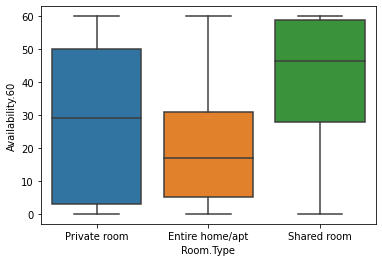

In [66]:
sns.boxplot(data=df_listings, y='Availability.60', x='Room.Type')
plt.show()

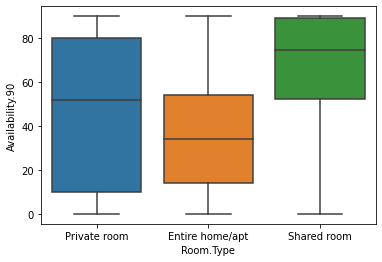

In [67]:
sns.boxplot(data=df_listings, y='Availability.90', x='Room.Type')
plt.show()

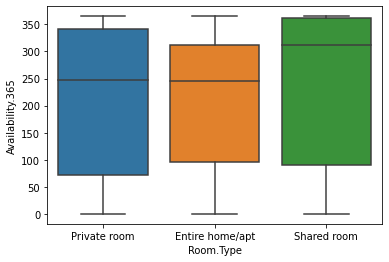

In [68]:
sns.boxplot(data=df_listings, y='Availability.365', x='Room.Type')
plt.show()

Although there are no significant outliers or null values, these columns would be more informative if converted to percentage of nights available per every period. Thus they could be compared more easily.

In [69]:
#convert days available to percentages
df_listings['Availability.30.Perc'] = round((df_listings['Availability.30'] / 30) * 100,2)
df_listings['Availability.60.Perc'] = round((df_listings['Availability.60'] / 60) * 100,2)
df_listings['Availability.90.Perc'] = round((df_listings['Availability.90'] / 90) * 100,2)
df_listings['Availability.365.Perc'] = round((df_listings['Availability.365'] / 365) * 100,2)

In [70]:
df_listings.filter(like='Availability').head()

,Availability.30,Availability.60,Availability.90,Availability.365,Availability.30.Perc,Availability.60.Perc,Availability.90.Perc,Availability.365.Perc
0,1,1,1,1,3.33,1.67,1.11,0.27
1,12,32,45,320,40.00,53.33,50.00,87.67
2,7,37,67,158,23.33,61.67,74.44,43.29
3,7,13,21,248,23.33,21.67,23.33,67.95
4,6,20,24,296,20.00,33.33,26.67,81.10


In [71]:
#drop the original columns
df_listings.drop(['Availability.30', 'Availability.60', 'Availability.90', 'Availability.365'], axis=1, inplace=True)

There are some missing values relative to number of Bedrooms, Bathrooms and Beds. Could they be explained by cheaper accomodation with no bedroom (a studio), bed (a sofa instead)?

In [72]:
df_listings.Price.median()

52.0

In [73]:
df_listings.loc[df_listings['Bathrooms'].isna(),'Price'].median()

52.5

In [74]:
df_listings.loc[df_listings['Beds'].isna(),'Price'].median()

40.0

In [75]:
df_listings.loc[df_listings['Bedrooms'].isna(),'Price'].median()

35.0

It might be the case for Beds and Bedrooms, but not in case for Bathrooms. However, the pattern isn't clear enough to impute these values.

#### Reviews

In [76]:
for i in list(df_listings.filter(like='Review.Scores')):
    print(f'Unique values for {i}: {df_listings[i].nunique()}, minimum value: {df_listings[i].min()}, maximum value: {df_listings[i].max()}')

Unique values for Review.Scores.Rating: 54, minimum value: 20.0, maximum value: 100.0
Unique values for Review.Scores.Accuracy: 9, minimum value: 2.0, maximum value: 10.0
Unique values for Review.Scores.Cleanliness: 9, minimum value: 2.0, maximum value: 10.0
Unique values for Review.Scores.Checkin: 9, minimum value: 2.0, maximum value: 10.0
Unique values for Review.Scores.Communication: 8, minimum value: 2.0, maximum value: 10.0
Unique values for Review.Scores.Location: 8, minimum value: 2.0, maximum value: 10.0
Unique values for Review.Scores.Value: 9, minimum value: 2.0, maximum value: 10.0


The Review.Scores.Rating has values from 20 to 100, while all other Review.Score columns use a 10 point scale.

Let's have a look at their distributions.

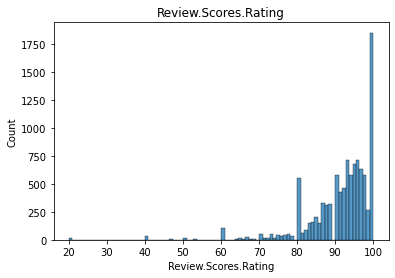

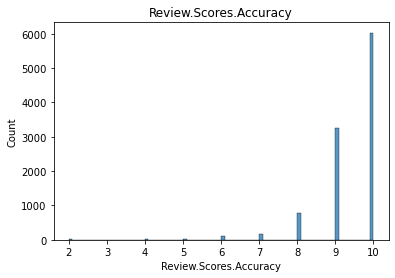

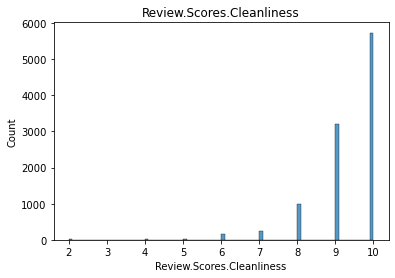

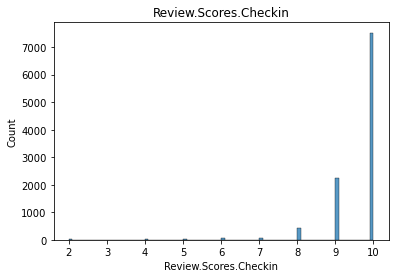

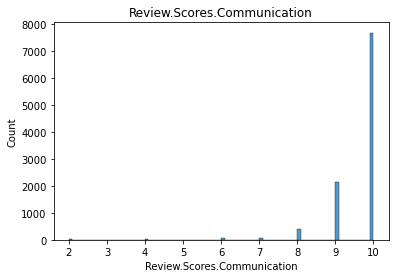

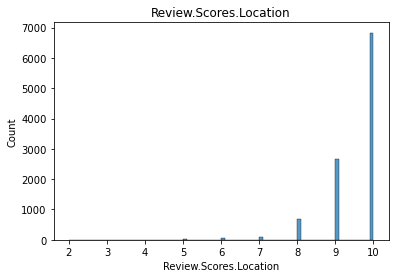

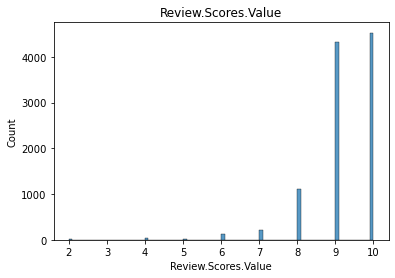

In [77]:
for i in list(df_listings.filter(like='Review.Scores')):
    sns.histplot(data=df_listings, x=i)
    plt.title(i)
    plt.show()

In [78]:
df_listings.filter(like='Review').isna().sum()

Number.of.Reviews                 0
Review.Scores.Rating           2895
Review.Scores.Accuracy         2913
Review.Scores.Cleanliness      2907
Review.Scores.Checkin          2923
Review.Scores.Communication    2907
Review.Scores.Location         2925
Review.Scores.Value            2925
Reviews.per.Month              2770
dtype: int64

There is roughly the same number of null values for all score-related columns. Cound it be explained by absence of reviews?

In [79]:
df_listings.loc[df_listings['Number.of.Reviews'] == 0, list(df_listings.filter(like='Review'))].isna().sum()

Number.of.Reviews                 0
Review.Scores.Rating           2770
Review.Scores.Accuracy         2770
Review.Scores.Cleanliness      2770
Review.Scores.Checkin          2770
Review.Scores.Communication    2770
Review.Scores.Location         2770
Review.Scores.Value            2770
Reviews.per.Month              2770
dtype: int64

A total of 2776 null values can be explained by the absence of reviews and imputing them would distort the analysis.

In [80]:
df_listings.shape

(13307, 78)

In [81]:
df_listings.to_csv('airbnb_ready.csv', sep=";")

### Prepare the dataset for ML model

In [82]:
df_listings.isna().sum()

ID                        0
Name                      0
House.Rules               0
Host.ID                   0
Host.Name                 0
                         ..
Madrid.Based             39
Availability.30.Perc      0
Availability.60.Perc      0
Availability.90.Perc      0
Availability.365.Perc     0
Length: 78, dtype: int64

In [83]:
list_col = df_listings.columns
for i in list_col:
    if df_listings[i].isna().any():
        print(i, df_listings[i].dtype)

Zipcode float64
Bathrooms float64
Bedrooms float64
Beds float64
Review.Scores.Rating float64
Review.Scores.Accuracy float64
Review.Scores.Cleanliness float64
Review.Scores.Checkin float64
Review.Scores.Communication float64
Review.Scores.Location float64
Review.Scores.Value float64
Reviews.per.Month float64
Madrid.Based object


I don't see a way to impute zipcode without distorting the data, so I will just drop this column

In [84]:
df_listings.drop('Zipcode', axis=1, inplace=True)

The number of Bathrooms, Bedrooms y Beds could be imputed with a median.

In [85]:
df_listings.Bathrooms.fillna(df_listings['Bathrooms'].median(), inplace=True)

In [86]:
df_listings.Bedrooms.fillna(df_listings['Bedrooms'].median(), inplace=True)

In [87]:
df_listings.Beds.fillna(df_listings['Beds'].median(), inplace=True)

Review.Scores are often rather correlated.

In [122]:
df_listings.filter(like='Score').corr()

,Review.Scores.Rating,Average_Review_Score
Review.Scores.Rating,1.000000,0.834697
Average_Review_Score,0.834697,1.000000


It might be a good idea to collapse them all except Review.Scores.Rating into one metric.

In [89]:
df_listings['Average_Review_Score'] = (df_listings['Review.Scores.Accuracy'] + df_listings['Review.Scores.Cleanliness'] + df_listings['Review.Scores.Checkin'] + df_listings['Review.Scores.Communication'] + df_listings['Review.Scores.Location'] + df_listings['Review.Scores.Value'])/6

In [90]:
df_listings.drop(['Review.Scores.Accuracy', 'Review.Scores.Cleanliness','Review.Scores.Checkin','Review.Scores.Communication', 'Review.Scores.Location', 'Review.Scores.Value'], axis=1, inplace=True)

As we have seem earlier, a null values in Review.Scores can be explained by the absence of reviews. For the model we could impute them with 0.01 quartile.

In [97]:
df_listings['Average_Review_Score'].quantile([0, 0.01, 0.25, 0.5, 0.75, 1])

0.00     2.333333
0.01     6.833333
0.25     9.166667
0.50     9.666667
0.75    10.000000
1.00    10.000000
Name: Average_Review_Score, dtype: float64

In [98]:
df_listings['Average_Review_Score'].fillna(df_listings['Average_Review_Score'].quantile(0.01), inplace=True)

Reviews.per.Month null values are due to no reviews and can be imputed with zeros.

In [99]:
df_listings['Reviews.per.Month'].fillna(0, inplace=True)

Let's have a look at Madrid.Based distribution.

<AxesSubplot:xlabel='Madrid.Based'>

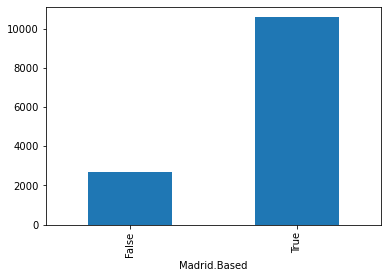

In [111]:
df_listings.groupby('Madrid.Based')['ID'].count().plot.bar()

In [118]:
df_listings[['Review.Scores.Rating', 'Average_Review_Score', 'Price']].corr()

,Review.Scores.Rating,Average_Review_Score,Price
Review.Scores.Rating,1.000000,0.834697,0.056233
Average_Review_Score,0.834697,1.000000,-0.053468
Price,0.056233,-0.053468,1.000000


We can replace null values in this column with a moda (True).

In [113]:
df_listings['Madrid.Based'].fillna(True, inplace=True)